In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [9]:
# Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv("medical-examination.csv")


# Create the overweight column in the df variable
df['overweight'] = df.apply(lambda row: 1 if row["weight"] /
                            ((row["height"] / 100)**2) > 25 else 0,
                            axis=1)

display(df)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [10]:
# Normalize data by making 0 always good and 1 always bad. If the value of
# cholesterol or gluc is 1, set the value to 0. If the value is more than 1,
# set the value to 1.
for col in ["cholesterol", "gluc"]:
    df[col] = df.apply(lambda row: 1 if row[col] > 1 else 0, axis=1)

display(df)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


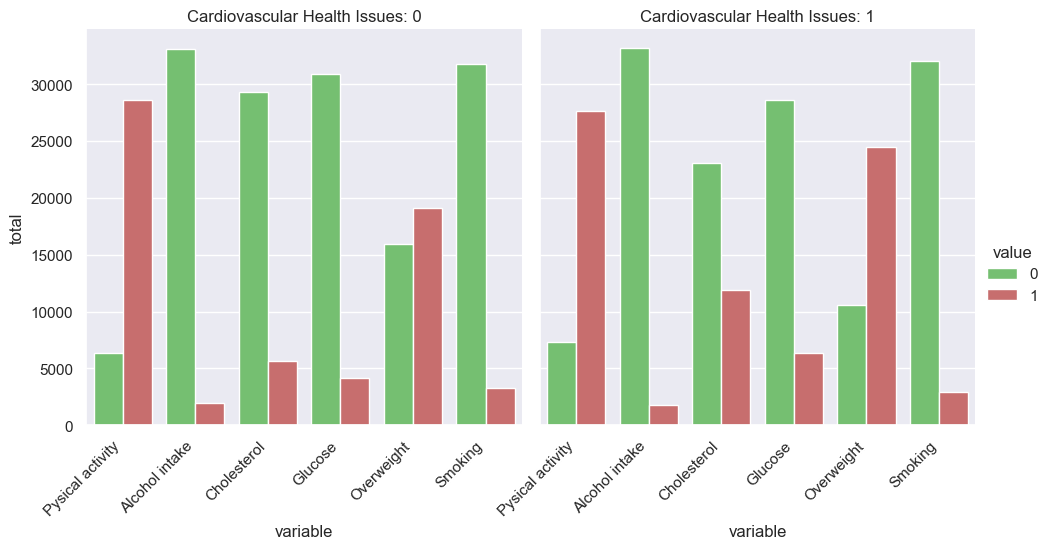

In [15]:
# Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():

    # Create a DataFrame for the cat plot using pd.melt with values from
    # cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    df_cat = pd.melt(df,
                     id_vars="cardio",
                     value_vars=[
                         "cholesterol", "gluc", "smoke", "alco", "active",
                         "overweight"
                     ])

    # Group and reformat the data in df_cat to split it by cardio. Show the
    # counts of each feature. You will have to rename one of the columns
    # for the catplot to work correctly.
    df_cat["total"] = 1
    df_cat = df_cat.groupby(["cardio", "variable", "value"],
                            as_index=False).count()

    # Create a chart that shows the value counts of the categorical features
    # using the following method provided by sns.catplot().
    # Get the figure for the output and store it in the fig variable.
    sns.set_theme(style="darkgrid")
    fig = sns.catplot(data=df_cat,
                      kind="bar",
                      x="variable",
                      y="total",
                      hue="value",
                      col="cardio",
                      palette=sns.color_palette(["#6ACC64", "#D65F5F"]))
    fig.set_xticklabels([
        "Pysical activity", "Alcohol intake", "Cholesterol", "Glucose",
        "Overweight", "Smoking"
    ],
                        rotation=45,
                        ha="right")
    # fig.set_xlabels("Health Issues")
    fig.set_titles("Cardiovascular Health Issues: {col_name}")

    # Do not modify the next two lines
    fig.savefig('catplot.png')


draw_cat_plot()


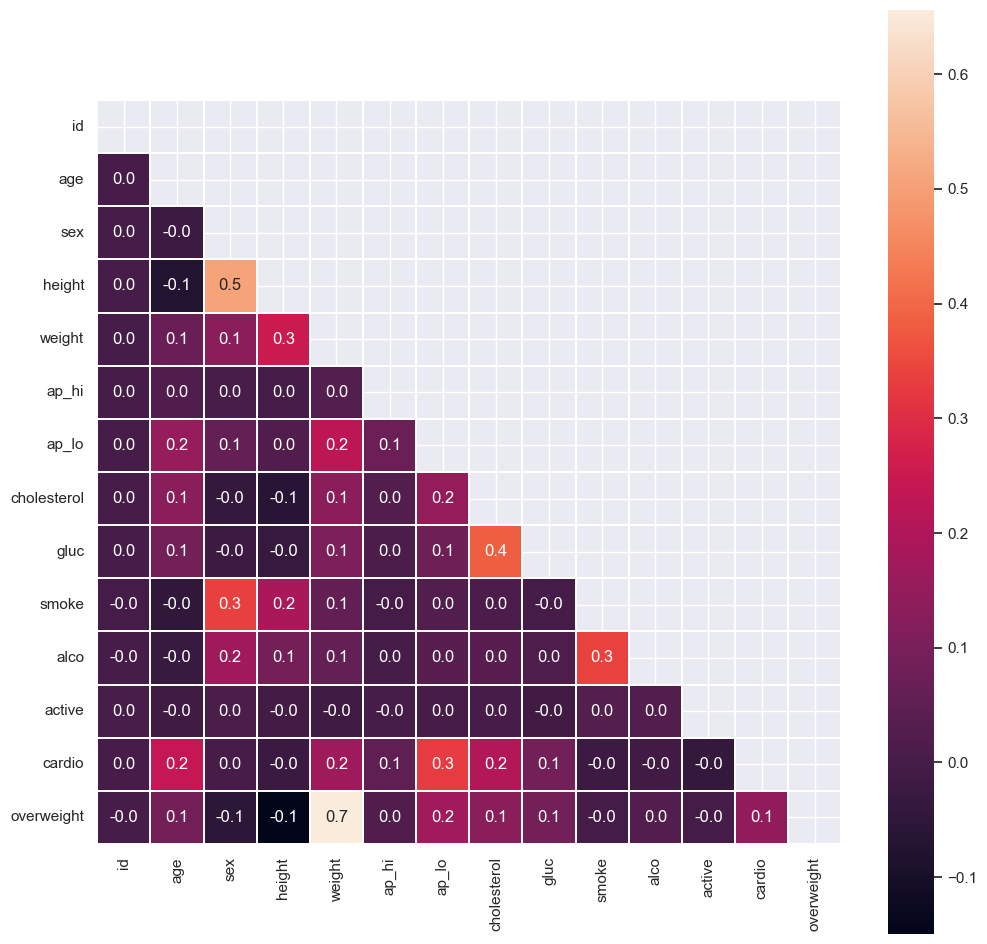

In [14]:
# Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
    # Clean the data in the df_heat variable by filtering out the following
    # patient segments that represent incorrect data:
    # - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # - height is more than the 97.5th percentile
    # - weight is less than the 2.5th percentile
    # - weight is more than the 97.5th percentile

    df_heat = df[(df['ap_lo'] <= df['ap_hi'])
                 & (df["height"] >= df["height"].quantile(0.025)) &
                 (df["height"] <= df["height"].quantile(0.975)) &
                 (df["weight"] >= df["weight"].quantile(0.025)) &
                 (df["weight"] <= df["weight"].quantile(0.975))]

    # Calculate the correlation matrix and store it in the corr variable.
    corr = df_heat.corr()

    # Generate a mask for the upper triangle and store it in the mask variable.
    mask = np.triu(corr)

    # Set up the matplotlib figure.
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot the correlation matrix using the method provided by sns.heatmap()
    sns.heatmap(corr,
                mask=mask,
                linewidths=0.2,
                annot=True,
                square=True,
                fmt=".1f")

    fig.savefig('heatmap.png')


draw_heat_map()
